In [316]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150

In [317]:
import h5py
import numpy as np
import matplotlib.pyplot as pl
from sklearn.decomposition import FastICA, RandomizedPCA

In [318]:
with h5py.File("data/k2/superstamp.h5", "r") as f:
    time = f["time"][-1000:]
    data = f["frames"][-1000:, 200:220, 375:420]
    # data = f["frames"][-1000:, :, :100]

In [319]:
# m = time["quality"] == 0
# data = data[m]
# time = time[m]["time"]

In [320]:
data.shape

(1000, 20, 45)

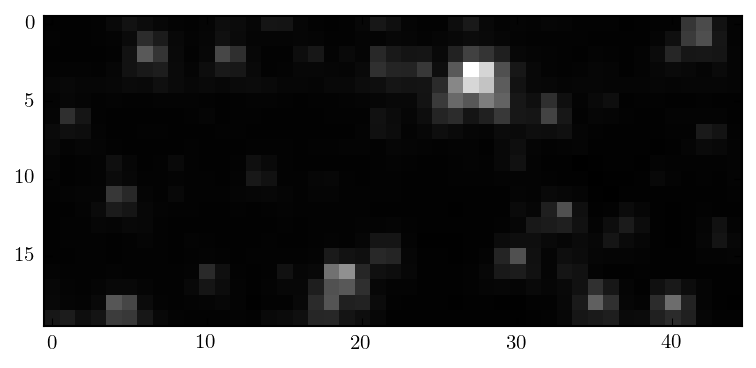

In [321]:
pl.imshow(np.log(data[0]), cmap="gray", interpolation="nearest");

In [322]:
block = data.reshape((len(data), -1))

In [329]:
model = FastICA(n_components=200)
model.fit(block.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=200, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [330]:
n = len(model.components_)
print(n)

200


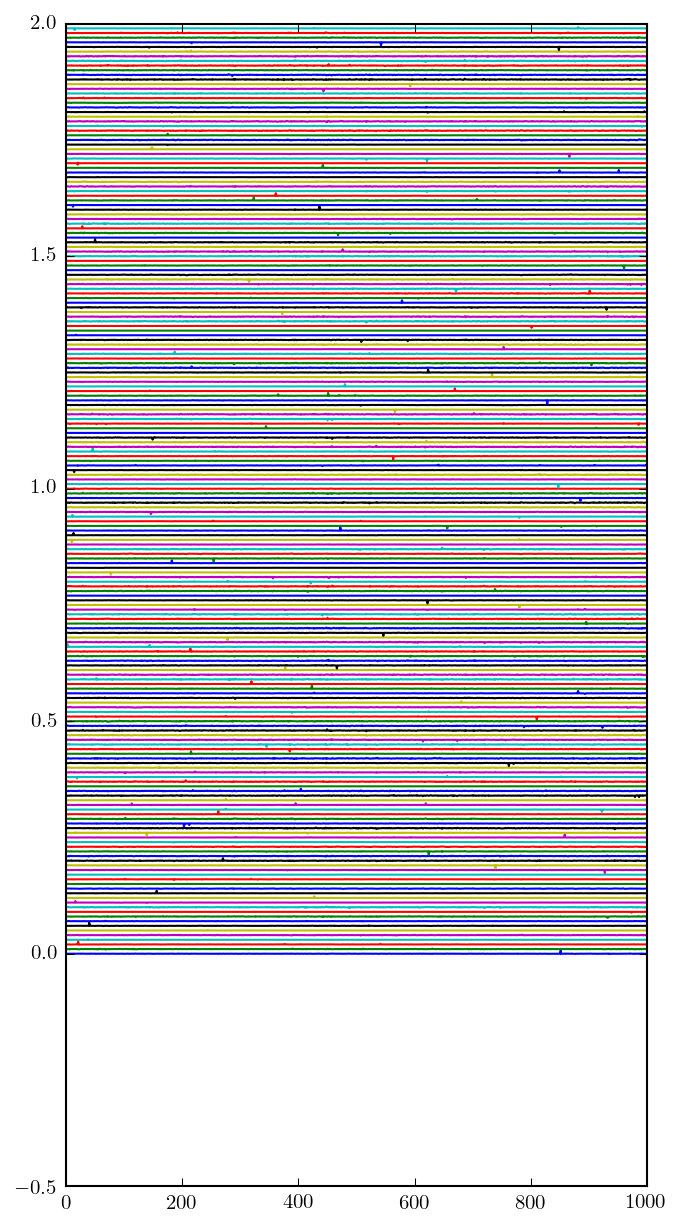

In [337]:
pl.figure(figsize=(5, 10))
pl.plot(model.components_.T + 1e-2*np.arange(n));

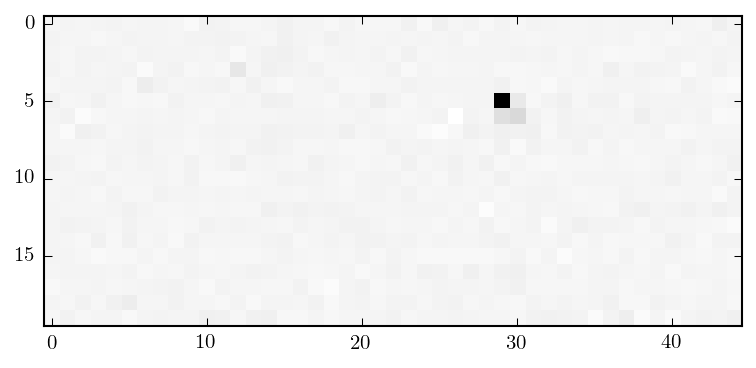

In [338]:
v = model.components_[1]
pl.imshow((np.dot(v, block)**2).reshape(data[0].shape), cmap="gray_r", interpolation="nearest")

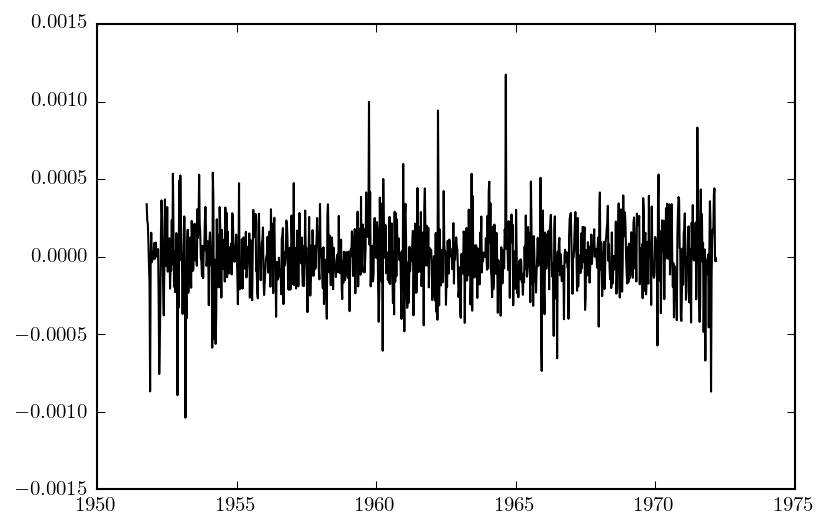

In [339]:
pl.plot(time, v, "k")
# pl.xlim(1955, 1960);

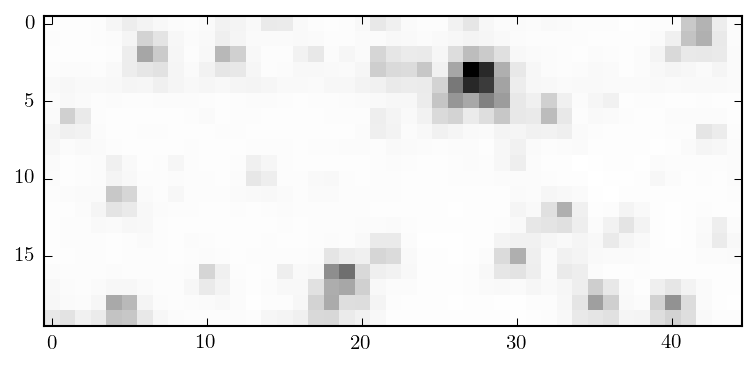

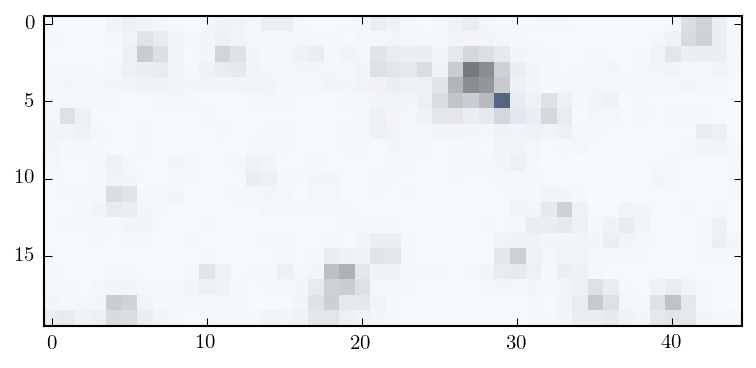

In [340]:
pl.figure()
pl.imshow(np.log(data[0]), cmap="gray_r", interpolation="nearest")
pl.figure()
pl.imshow(np.log(data[0]), cmap="gray_r", interpolation="nearest")
pl.imshow((np.dot(v, block)**2).reshape(data[0].shape), cmap="Blues", interpolation="nearest", alpha=0.5);